The country with most attacks is: USA
The state with most attacks is: Florida
The activity in which most attacks occurs is: Surfing
Top 10 combinaciones país-estado-actividad más frecuentes:
country       state                  activity
USA           Florida                Surfing     376
                                     Swimming    149
AUSTRALIA     New South Wales        Surfing     118
USA           California             Surfing      84
              Florida                Wading       76
AUSTRALIA     New South Wales        Swimming     72
USA           Hawaii                 Surfing      71
SOUTH AFRICA  Eastern Cape Province  Surfing      58
AUSTRALIA     Queensland             Swimming     58
USA           Florida                Fishing      46
dtype: int64
           date       country                  state       activity
8    2024-09-01     AUSTRALIA        South Australia        Surfing
9    2024-05-01  SOUTH AFRICA  Eastern Cape Province        Fishing
74   2023-07-06 

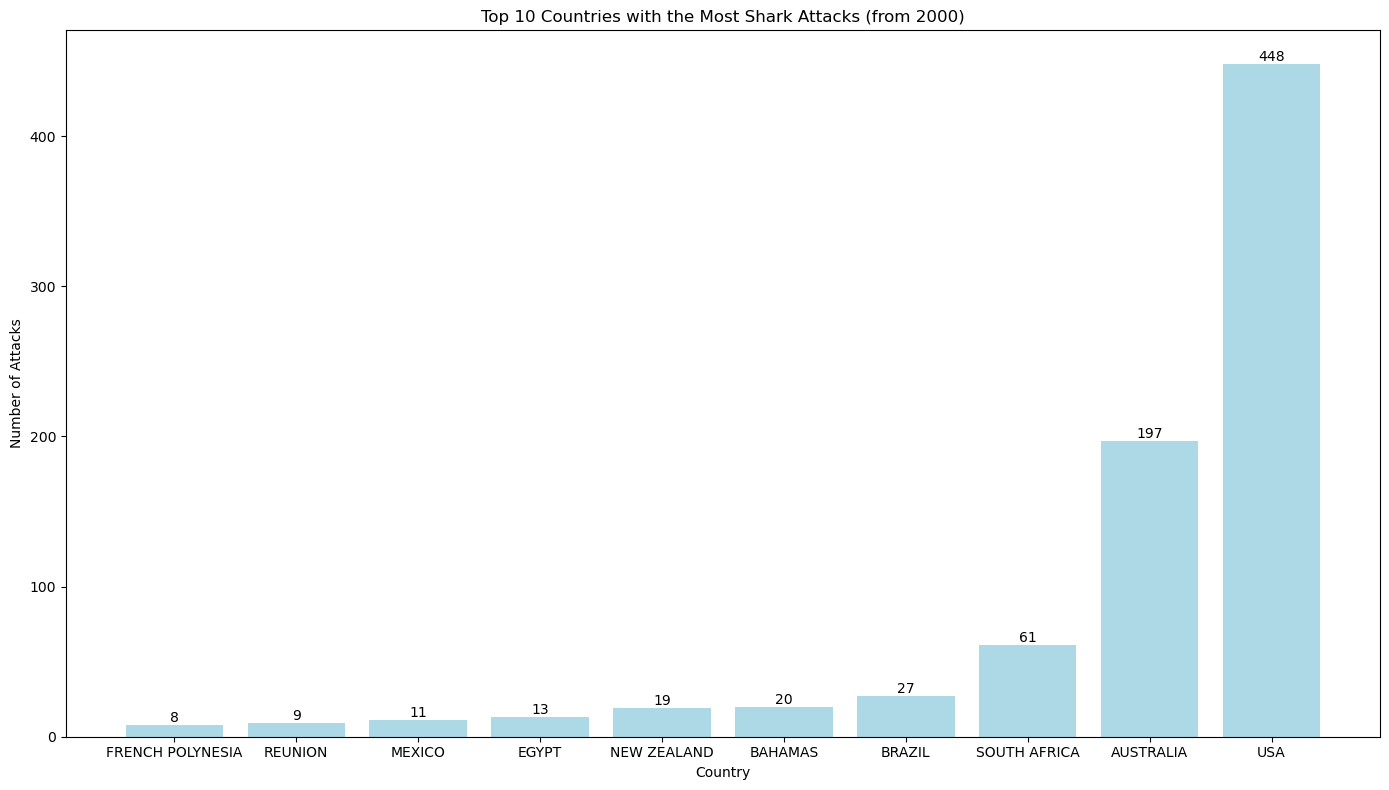

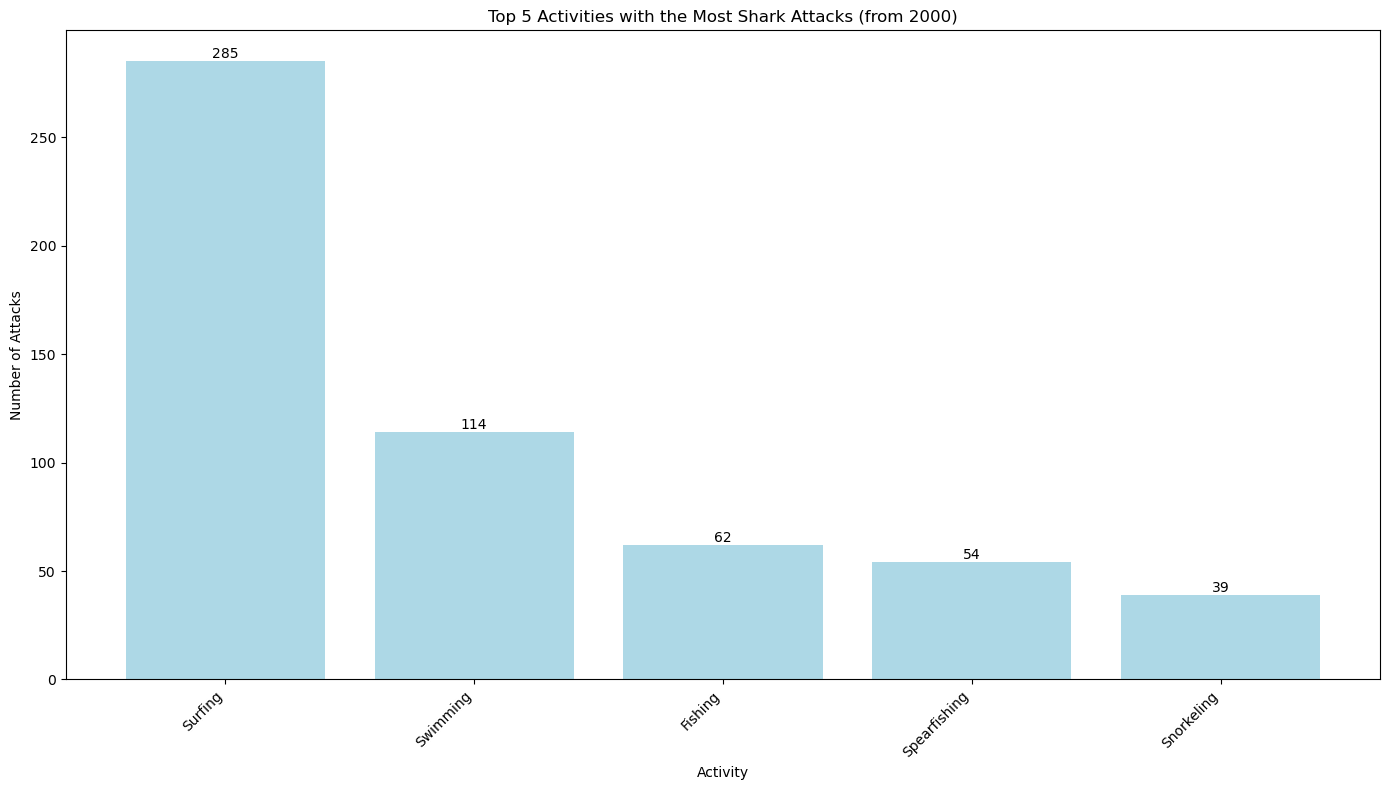

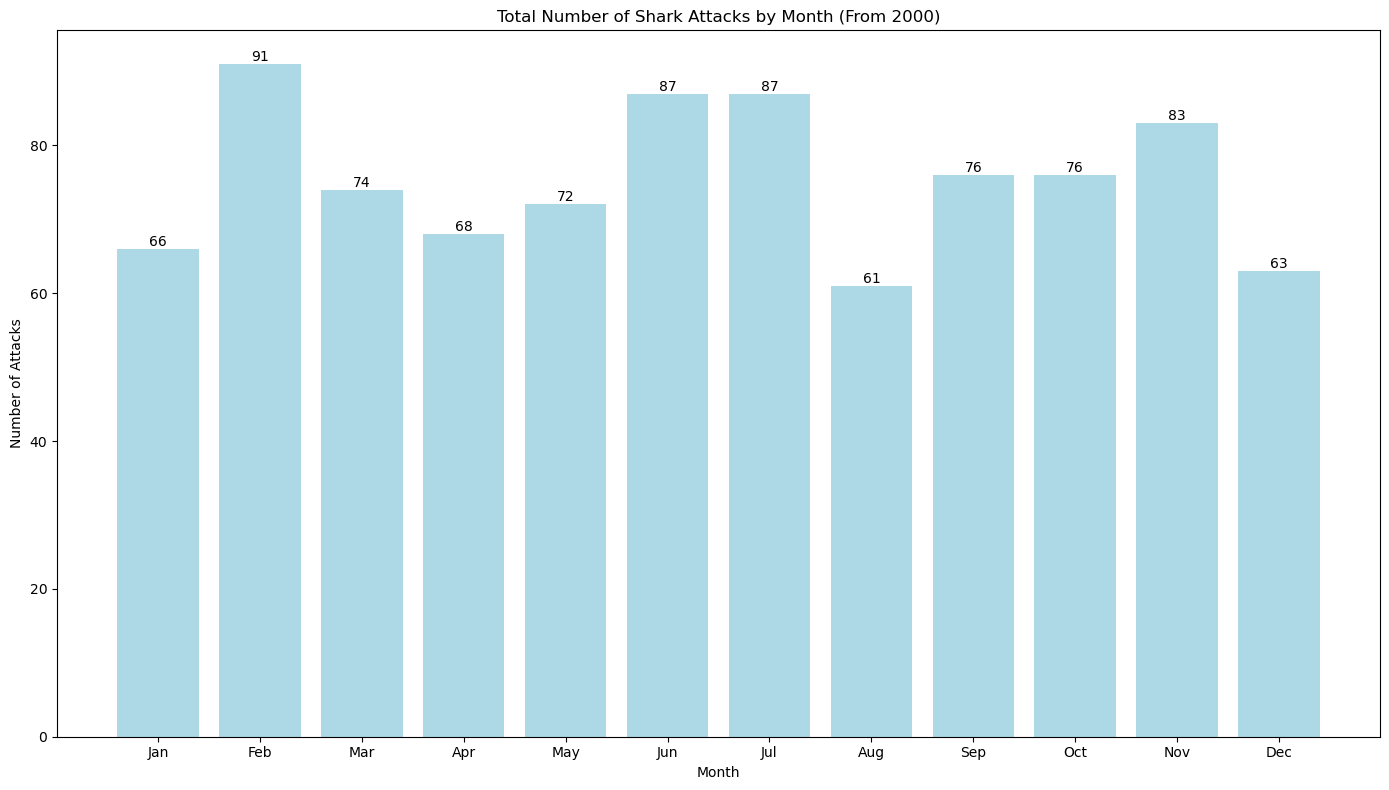

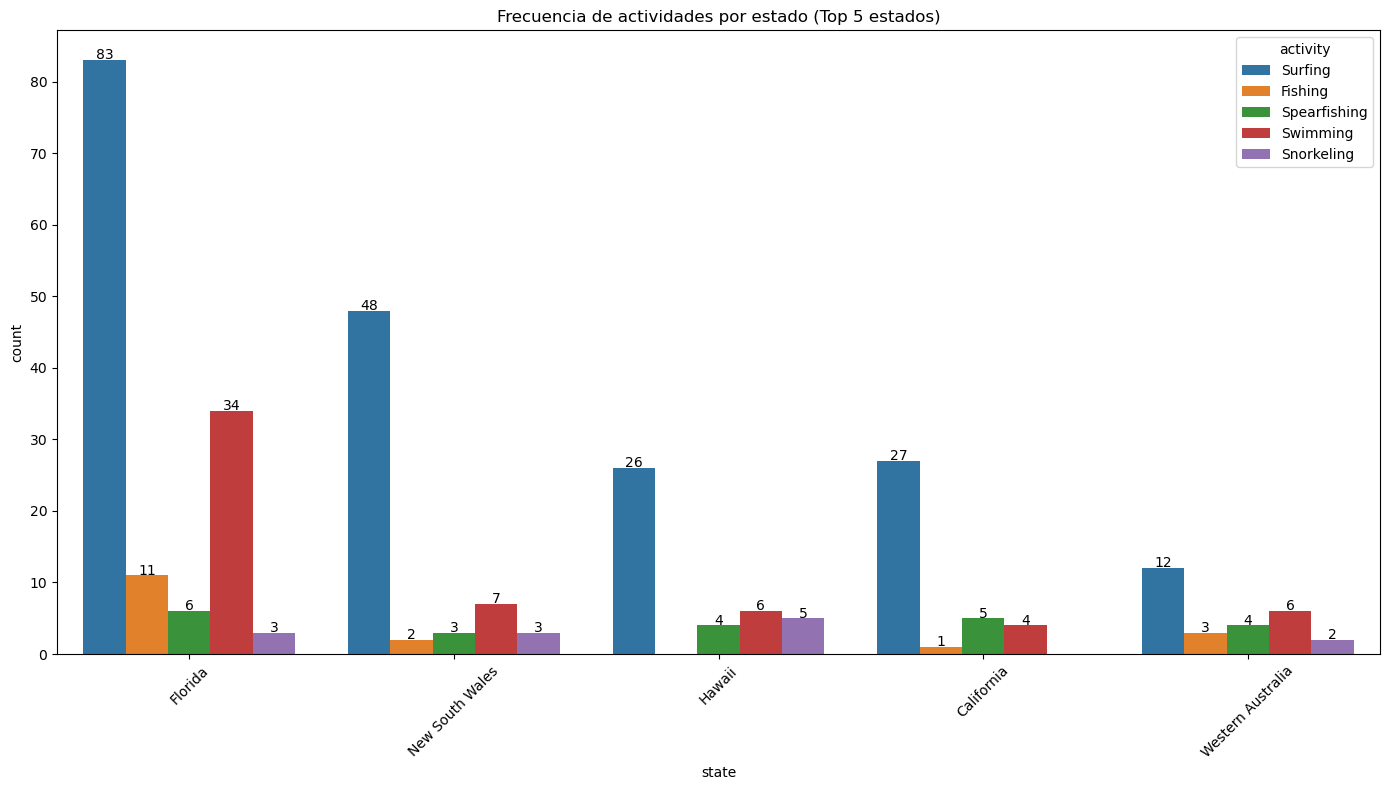

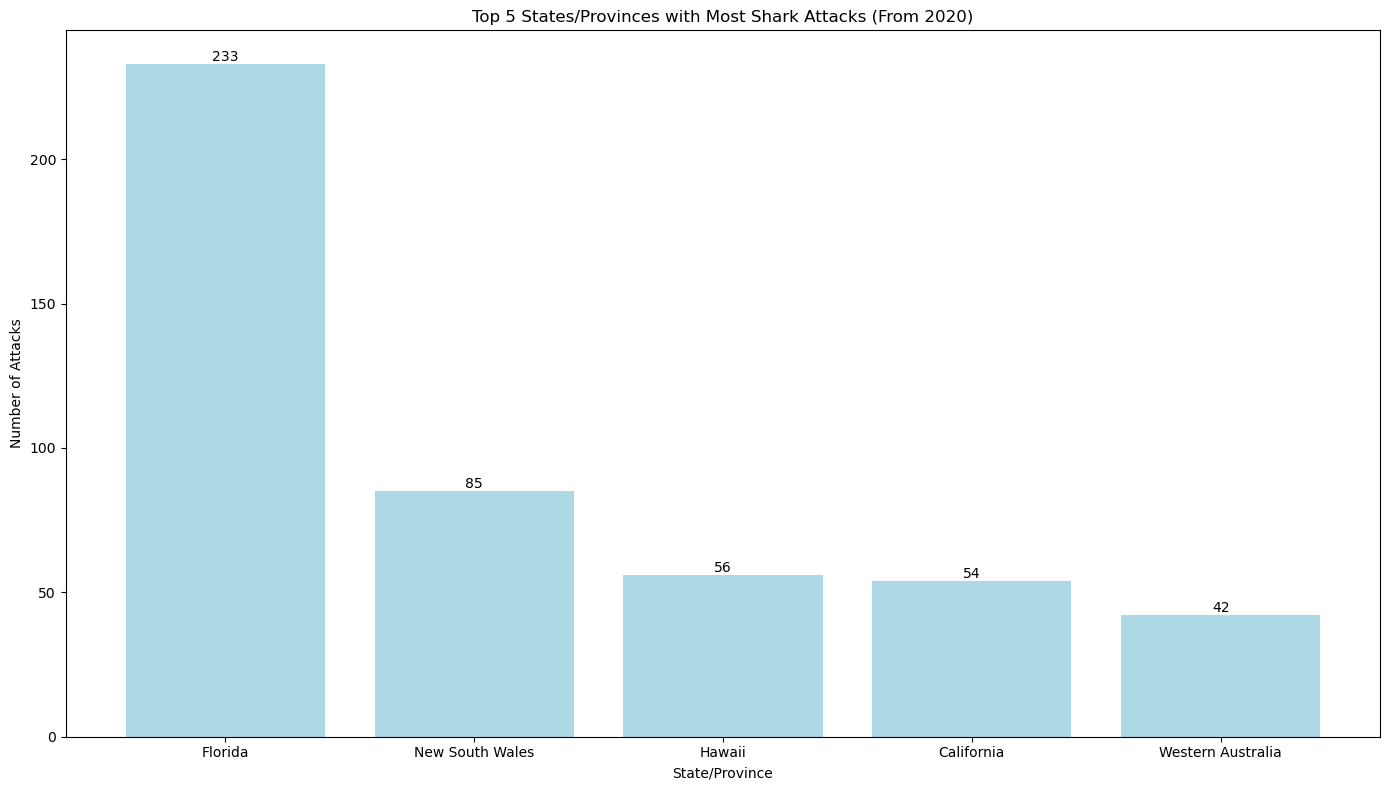

           date       country                  state       activity  month
8    2024-09-01     AUSTRALIA        South Australia        Surfing      9
9    2024-05-01  SOUTH AFRICA  Eastern Cape Province        Fishing      5
74   2023-07-06       BAHAMAS               Freeport   Scuba diving      7
84   2023-11-05           USA                Florida        Sitting     11
85   2023-11-05           USA                 Hawaii  Kayak fishing     11
...         ...           ...                    ...            ...    ...
2682 2000-09-03     AUSTRALIA        New South Wales         Rowing      9
2684 2000-02-03     AUSTRALIA        New South Wales       Swimming      2
2689 2000-03-02   NEW ZEALAND           South Island        Surfing      3
2690 2000-01-02     AUSTRALIA        South Australia        Surfing      1
2692 2000-05-01      THAILAND     Phang nga Province         Diving      5

[904 rows x 5 columns]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from cleaning import*
url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'

df = pd.read_excel(url)

df = delete_columns(df)
df= clean_data(df)
df['date'] = df['date'].apply(remove_prefix)
df['date'] = df['date'].apply(fix_format_date)
df = filter_date(df)
result = get_mode_of_attacks(df)
top_activities = top_country_state_activity(df, 10)





# Filtrar desde 2020
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_filtered = df[df['date'] >= pd.to_datetime('2000-01-01')]

# Crear nueva columna de mes/año para agrupar
df_filtered['month_year'] = df_filtered['date'].dt.to_period('M').astype(str)
attacks_grouped = df_filtered.groupby(['country', 'state', 'activity', 'month_year']).size().reset_index(name='count')
# Contar el número de ataques por mes
attacks_per_country = df_filtered.groupby('country').size().reset_index(name='count')

top_20_countries = attacks_per_country.sort_values(by='count', ascending=False).head(10)

# Graficar los ataques por mes
plt.figure(figsize=(14, 8))
bars = plt.bar(top_20_countries['country'], top_20_countries['count'], color='lightblue')

# Añadir los números dentro de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', color='black')

plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Countries with the Most Shark Attacks (from 2000)')
plt.gca().invert_xaxis() # Invertir el eje Y para que el país con más ataques esté arriba
plt.tight_layout()
plt.show()

attacks_per_activity = df_filtered.groupby('activity').size().reset_index(name='count')

# Ordenar las actividades por la cantidad de ataques en orden descendente y seleccionar las 5 primeras
top_5_activities = attacks_per_activity.sort_values(by='count', ascending=False).head(5)

# Crear un gráfico de barras con las 5 actividades con más ataques
plt.figure(figsize=(14, 8))
bars = plt.bar(top_5_activities['activity'], top_5_activities['count'], color='lightblue')

# Añadir los números dentro de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', color='black')
plt.xlabel('Activity')
plt.ylabel('Number of Attacks')
plt.title('Top 5 Activities with the Most Shark Attacks (from 2000)')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para mejor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()



# Graficar los ataques por mes


df['month'] = df['date'].dt.month

# Agrupar por mes y contar los ataques
attacks_per_month = df.groupby('month').size().reset_index(name='count')

# Crear un gráfico de barras de ataques por mes
plt.figure(figsize=(14, 8))
bars = plt.bar(attacks_per_month['month'], attacks_per_month['count'], color='lightblue')

# Añadir los números dentro de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', color='black')

# Configuraciones del gráfico
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.title('Total Number of Shark Attacks by Month (From 2000)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Mostrar el gráfico
plt.tight_layout()
plt.show()

top_states = df['state'].value_counts().head(5).index
# Filtrar por esos estados y graficar las actividades
filtered_data = df[df['state'].isin(top_states)]
# Seleccionar las actividades con más ataques
top_activities = df['activity'].value_counts().head(5).index
# Filtrar por esas actividades
filtered_data = df[df['activity'].isin(top_activities)]
# Crear un gráfico de barras apiladas
 #Crear el gráfico de barras apiladas
plt.figure(figsize=(14, 8))
barplot = sns.countplot(data=filtered_data, x='state', hue='activity', order=top_states)

# Añadir los números sobre las barras
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Solo añadir texto si la altura es mayor que cero
        barplot.text(p.get_x() + p.get_width() / 2, height + 0.1, int(height), ha="center")

# Ajustar el gráfico
plt.title('Frecuencia de actividades por estado (Top 5 estados)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


attacks_per_state = df.groupby('state').size().reset_index(name='count')

# Obtener los 5 estados/provincias con más ataques
top_5_states = attacks_per_state.sort_values(by='count', ascending=False).head(5)

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
bars = plt.bar(top_5_states['state'], top_5_states['count'], color='lightblue')

# Añadir los números dentro de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', color='black')

# Configuraciones del gráfico
plt.xlabel('State/Province')
plt.ylabel('Number of Attacks')
plt.title('Top 5 States/Provinces with Most Shark Attacks (From 2020)')
plt.tight_layout()
plt.show()

print(df)